# **1. Perkenalan Dataset**


Proyek ini menggunakan dataset berjudul **"Customer Shopping Trends Dataset"** yang diperoleh dari Kaggle. Dataset ini menyajikan informasi mengenai perilaku belanja konsumen dan pola pembelian yang dapat memberikan wawasan penting bagi bisnis dalam menyesuaikan produk, strategi pemasaran, dan pengalaman pelanggan mereka.

Dataset ini dapat diakses melalui tautan berikut:  
[Customer Shopping Trends Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)

### Deskripsi Umum

- **Jumlah Baris**: Dataset ini terdiri dari 3900 baris yang berisi data pelanggan.
- **Jenis Data**: Dataset ini mencakup kolom numerikal dan kategorikal, yang relevan untuk analisis clustering.
- **Tujuan**: Dataset ini bertujuan untuk menganalisis preferensi konsumen dan tren belanja mereka berdasarkan beberapa fitur pelanggan.

### Penjelasan Kolom Dataset

Berikut adalah penjelasan tentang kolom-kolom yang terdapat dalam dataset ini:

| Kolom                  | Deskripsi                                                                 |
|------------------------|---------------------------------------------------------------------------|
| **Customer ID**         | ID unik untuk setiap pelanggan                                           |
| **Age**                 | Umur pelanggan (numerikal)                                               |
| **Gender**              | Jenis kelamin pelanggan (Male/Female) (kategorikal)                      |
| **Item Purchased**      | Barang yang dibeli oleh pelanggan (kategorikal)                           |
| **Category**            | Kategori barang yang dibeli (kategorikal)                                |
| **Purchase Amount (USD)** | Jumlah uang yang dibelanjakan dalam USD (numerikal)                     |
| **Location**            | Lokasi tempat pembelian dilakukan (kategorikal)                          |
| **Size**                | Ukuran barang yang dibeli (kategorikal)                                  |
| **Color**               | Warna barang yang dibeli (kategorikal)                                   |
| **Season**              | Musim saat pembelian dilakukan (kategorikal)                             |
| **Review Rating**       | Rating yang diberikan pelanggan terhadap item yang dibeli (numerikal)    |
| **Subscription Status** | Status pelanggan apakah memiliki langganan (Yes/No) (kategorikal)       |
| **Shipping Type**       | Jenis pengiriman yang dipilih oleh pelanggan (kategorikal)               |
| **Discount Applied**    | Menunjukkan apakah diskon diterapkan pada pembelian (Yes/No) (kategorikal) |
| **Promo Code Used**     | Menunjukkan apakah kode promo digunakan pada pembelian (Yes/No) (kategorikal) |
| **Previous Purchases**  | Total jumlah transaksi sebelumnya yang dilakukan pelanggan (numerikal)  |
| **Payment Method**      | Metode pembayaran yang paling disukai pelanggan (kategorikal)            |
| **Frequency of Purchases** | Frekuensi pembelian yang dilakukan pelanggan (kategorikal)             |

### Relevansi Dataset untuk Analisis Clustering

Dataset ini sangat relevan untuk analisis clustering karena mengandung kombinasi data numerikal dan kategorikal yang dapat membantu dalam mengidentifikasi kelompok pelanggan berdasarkan preferensi belanja mereka.


# **2. Import Library**

Berikut ini adalah beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning dalam proyek ini:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Dalam tahap ini, Dataset Shopping Trend dimuat melalui Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/IDCAMP/Proyek_Akhir_BMLP_Navy/shopping_trends_for_clustering.csv'
df = pd.read_csv(file_path)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## a. Memahami Struktur Data
- Meninjau jumlah baris dan kolom dalam dataset
- Meninjau jenis data di setiap kolom (numerikal atau kategorikal)

In [4]:
print("Jumlah baris dan kolom dalam dataset: ", df.shape)

Jumlah baris dan kolom dalam dataset:  (3900, 19)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Berdasarkan output di atas, diketahui bahwa:
- Dataset ini memiliki 3900 entri dan 19 kolom. Setiap kolom dalam dataset ini memiliki tipe data tertentu.
- Variabel Numerik: Customer ID, Age, Purchase Amount (USD), Review Rating, Previous Purchases.
- Variabel Kategorikal: Gender, Item Purchased, Category, Location, Size, Color, Season, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Preferred Payment Method, Frequency of Purchases.

## b. Menangani Data yang Hilang

Tahap selanjutnya adalah identifikasi dan analisis data yang hilang (missing values). Jika terdapat missing value, maka nilai yang hilang akan diisi dengan rata-rata (untuk data numerik) atau modus (untuk data kategorikal), atau menghapus baris yang memiliki missing value.

In [6]:
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


Berdasarkan output di atas, dataset tidak memiliki missing value sehingga dapat melanjutkan ke tahap selanjutnya untuk lebih mengenal distribusi dan korelasi data

## c. Analisis Distribusi dan Korelasi

Tahap selanjutnya adalah menganalisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Menganalisis Distribusi Variabel Numerik
- Histogram untuk Menganalisis Distribusi
- Boxplot untuk Menganalisis Outlier

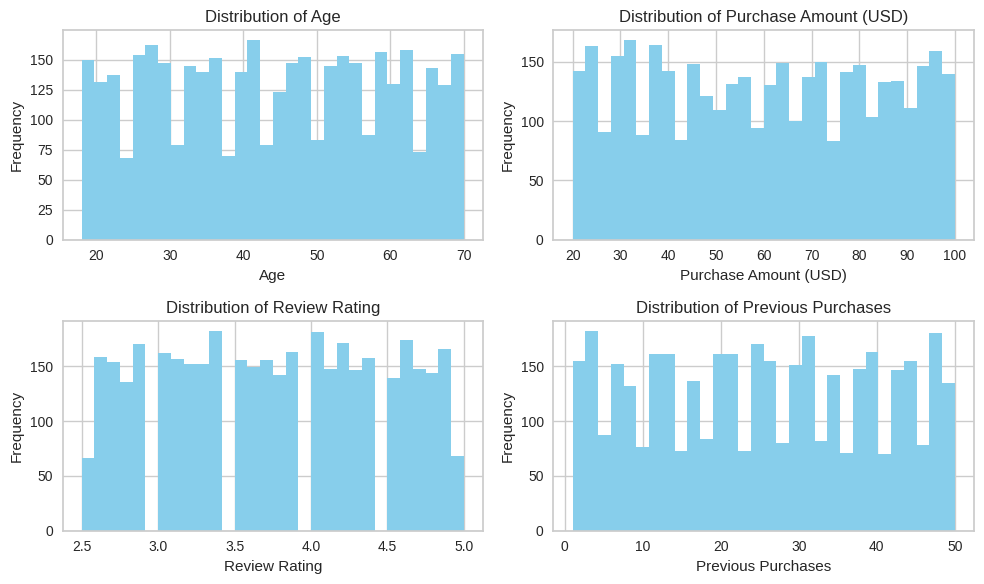

In [8]:
# Menggambar histogram untuk setiap kolom numerik
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

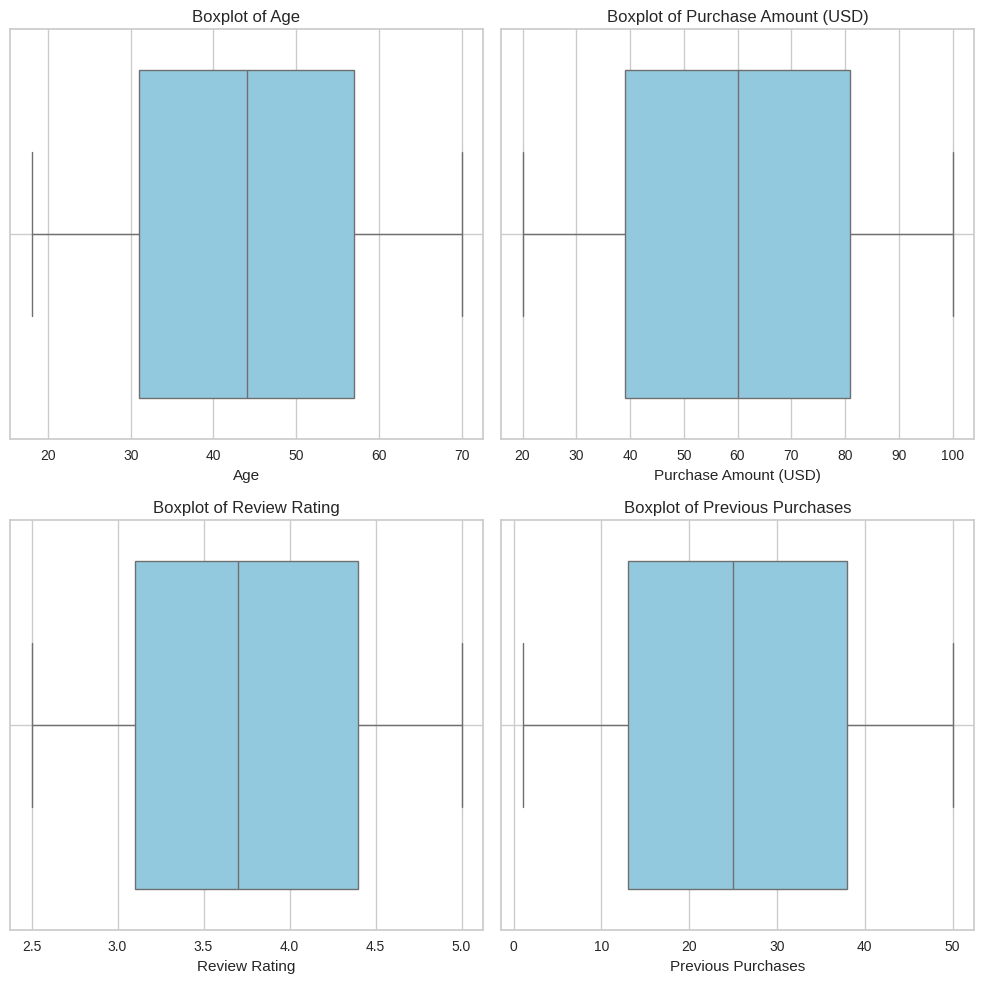

In [9]:
# Menggambar boxplot variabel numerik untuk Menganalisis Outlier
num_plots = len(numerical_columns)
cols = 2
rows = (num_plots // cols) + (num_plots % cols)

fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Menganalisis Korelasi Antar Variabel
- Matriks Korelasi dan Visualisasi Heatmap digunakan untuk memahami hubungan antar variabel numerik. Matriks korelasi menunjukkan sejauh mana variabel-variabel saling terkait.
- Scatter Plot untuk Menelusuri Hubungan Antar Variabel

In [10]:
# Menghitung matriks korelasi antar variabel numerik
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                            Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000000              -0.010424      -0.021949   
Purchase Amount (USD) -0.010424               1.000000       0.030776   
Review Rating         -0.021949               0.030776       1.000000   
Previous Purchases     0.040445               0.008063       0.004229   

                       Previous Purchases  
Age                              0.040445  
Purchase Amount (USD)            0.008063  
Review Rating                    0.004229  
Previous Purchases               1.000000  


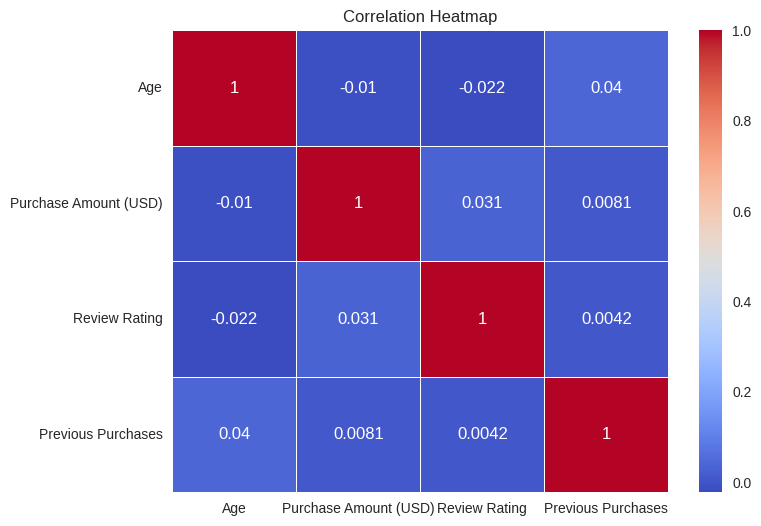

In [11]:
# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Insight yang didapat:**

**Statistik Deskriptif:**
- Customer ID: ID unik untuk pelanggan dengan rentang 1 hingga 3900.
- Age: Rata-rata usia 44.07 tahun, rentang 18 hingga 70 tahun. Mayoritas pelanggan berusia 31-57 tahun.
- Purchase Amount (USD): Rata-rata $59.76, dengan rentang $20 hingga $100, menunjukkan variasi pembelian yang signifikan.
- Review Rating: Rata-rata rating 3.75, rentang 2.5 hingga 5.0. Sebagian besar pelanggan memberi rating antara 3.1 hingga 4.4.
- Previous Purchases: Rata-rata 25.35 pembelian sebelumnya, dengan rentang 1 hingga 50.

**Distribusi Data:**
- Age: Distribusi usia cenderung normal, mayoritas pelanggan berada di usia 30-50 tahun.
- Purchase Amount (USD): Pembelian menunjukkan variasi besar, dengan beberapa pelanggan melakukan pembelian besar.
- Review Rating: Mayoritas rating positif antara 3.7 hingga 4.4.
- Previous Purchases: Banyak pelanggan dengan riwayat pembelian rendah, beberapa pelanggan memiliki lebih dari 25 pembelian.

**Matriks Korelasi:**
- Age dan Purchase Amount (USD): Korelasi sangat rendah (-0.0104), menunjukkan tidak ada hubungan antara usia dan jumlah pembelian.
- Age dan Review Rating: Korelasi sangat rendah (-0.0219), usia tidak mempengaruhi rating.
- Purchase Amount (USD) dan Review Rating: Korelasi sangat rendah (0.0308), pembelian tidak mempengaruhi rating.
- Previous Purchases: Korelasi sangat rendah dengan variabel lainnya, menunjukkan riwayat pembelian tidak berhubungan kuat dengan faktor lain.

**Boxplot dan Outlier:**
Tidak ada outlier yang menunjukkan bahwa distribusi data terjaga dengan baik.

## d. Visualisasi Data

Selanjutnya dilakukan visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
- Visualisasi Grafik Distribusi untuk Variabel Kategorikal
- Visualisasi Pairplot
- Visualisasi Korelasi untuk Variabel Kategorikal vs Numerik

<ipython-input-12-8f6662dd8364>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-12-8f6662dd8364>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-12-8f6662dd8364>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-12-8f6662dd8364>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

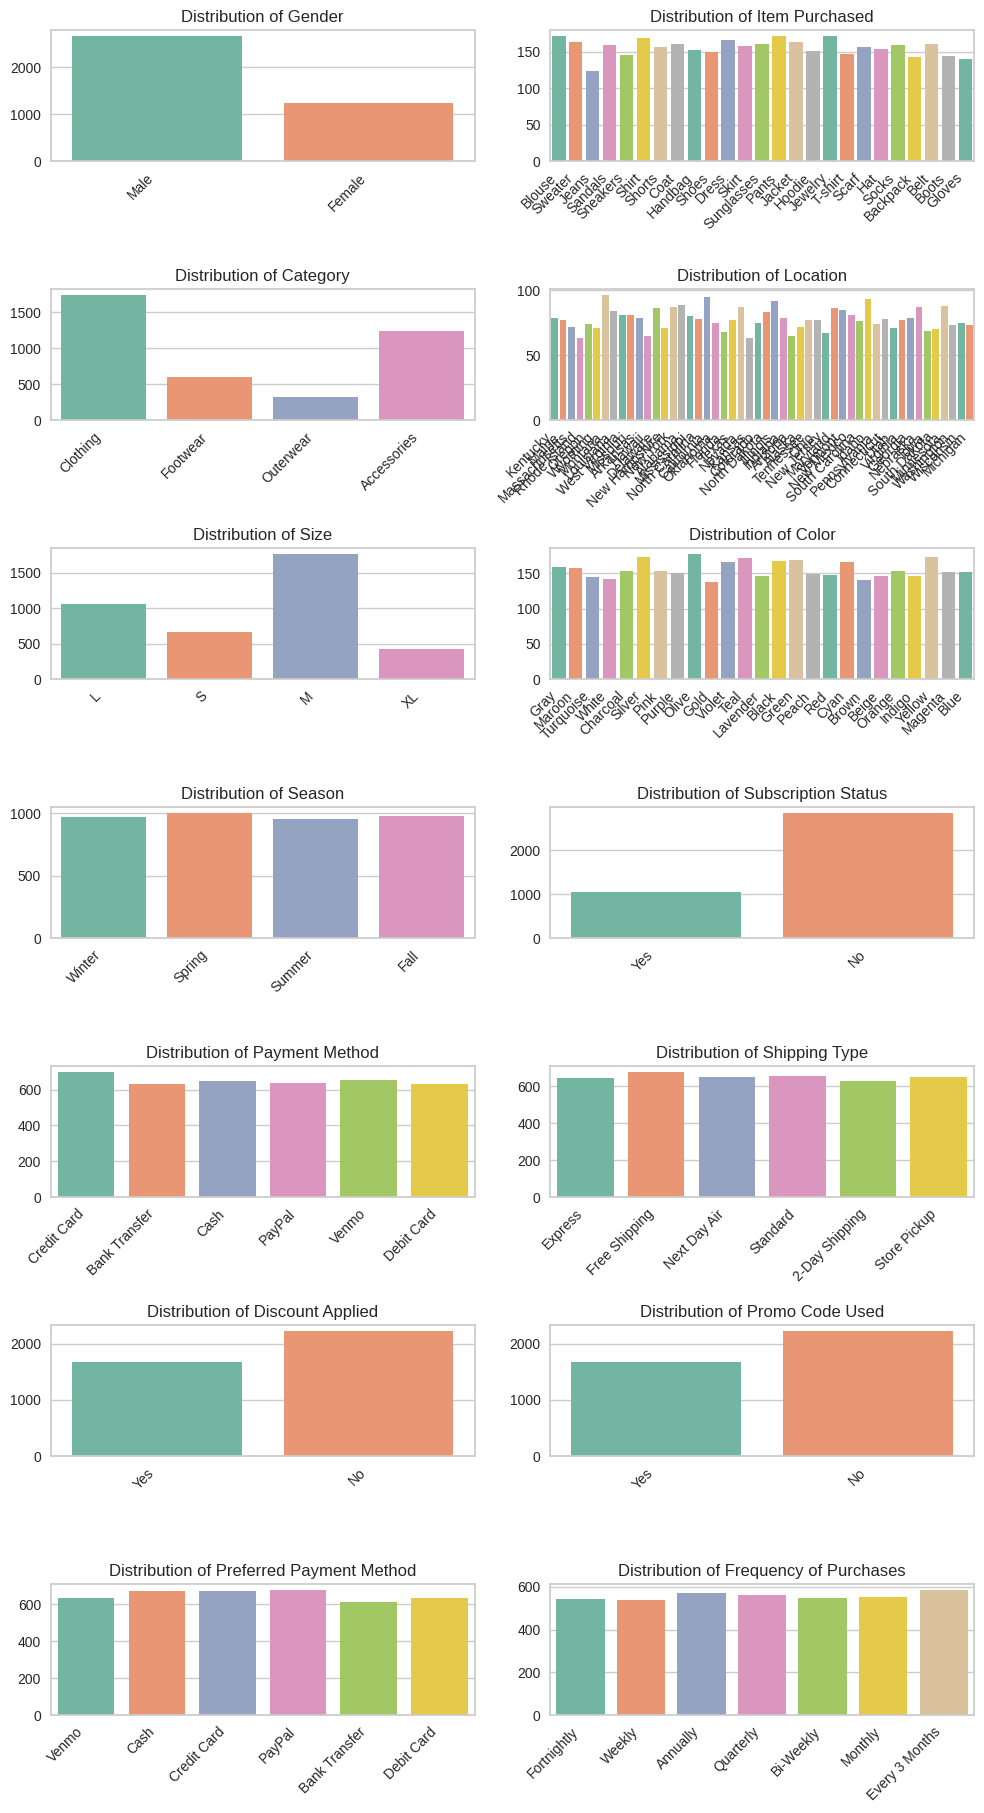

In [12]:
# Visualisasi distribusi untuk variabel kategorikal
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                       'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied',
                       'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
plt.figure(figsize=(10, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 2 + 1, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

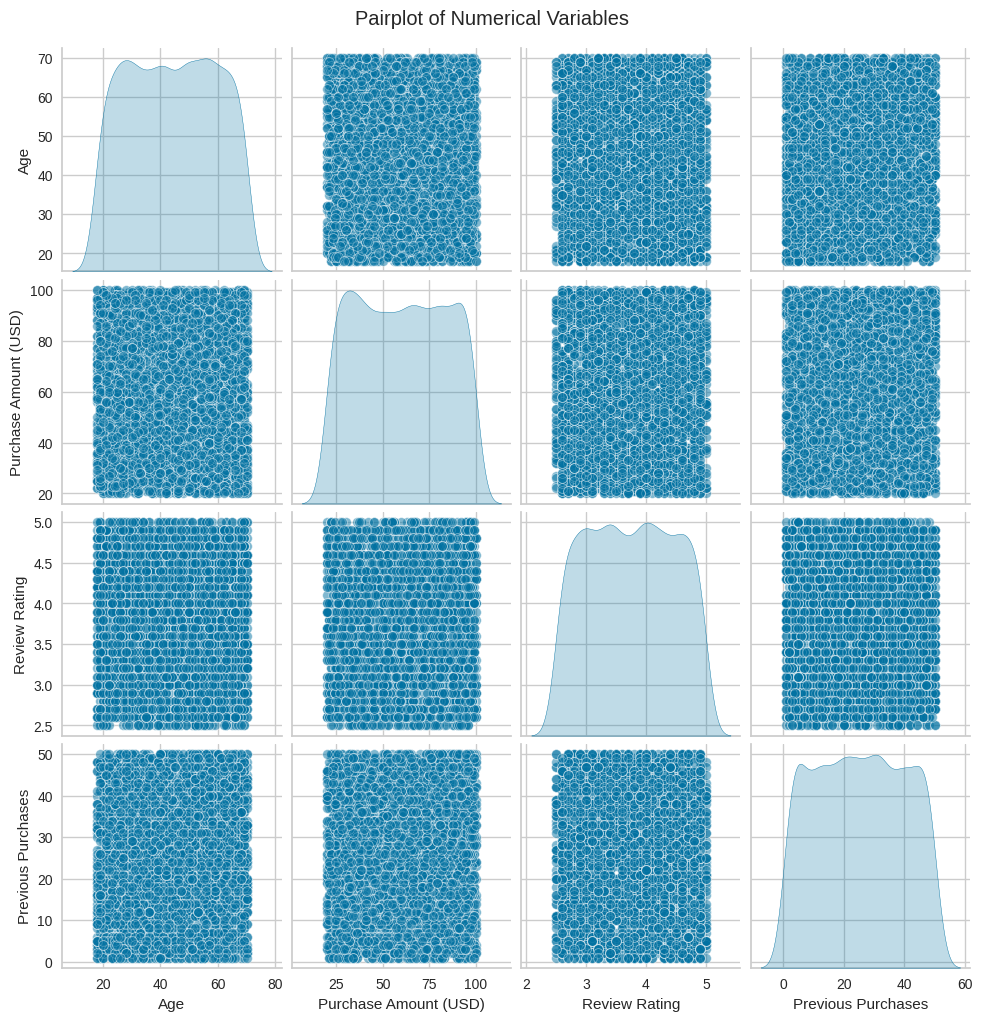

In [13]:
# Visualisasi hubungan antar variabel numerik menggunakan pairplot
sns.pairplot(df[numerical_columns], height=2.5, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

a. **Menghapus atau Menangani Data Kosong (Missing Values)**

Berdasarkan pengecekan missing value di tahap EDA, diketahui jika dataset ini tidak memiliki missing value, sehingga tahapan untuk menangani missing value tidak perlu dilakukan

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


b. **Menghapus Data Duplikat**

In [15]:
# Cek data duplikat
duplicate_data = df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicate_data}')

Jumlah data duplikat: 0


Berdasarkan output di atas, diketahui jika tidak terdapat data duplikat

c. **Penanganan Outlier**

Berdasarkan pengecekan pada tahap EDA, diketahui jika tidak terdapat outlier dalam dataset, sehingga tidak diperlukan penanganan lebih lanjut.

d. **Encoding Data Kategorikal**
Kolom kategorikal harus diubah menjadi format numerik terlebih dahulu karena banyak algoritma machine learning memerlukan data numerik. Encoding mengubah kolom-kolom kategorikal menjadi representasi numerik yang bisa diproses oleh model.

In [16]:
# Mapping Manual
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df['Size'] = df['Size'].replace(size_mapping)

gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].replace(gender_mapping)

season_mapping = {'Spring': 0,'Summer': 1,'Fall': 2,'Winter': 3
}
df['Season'] = df['Season'].replace(season_mapping)

yes_no_mapping = {'No': 0,'Yes': 1
}
df['Subscription Status'] = df['Subscription Status'].replace(yes_no_mapping)
df['Discount Applied'] = df['Discount Applied'].replace(yes_no_mapping)
df['Promo Code Used'] = df['Promo Code Used'].replace(yes_no_mapping)

# Label Encoding untuk kategori lainnya menggunakan LabelEncoder
le = LabelEncoder()
df['Item Purchased'] = le.fit_transform(df['Item Purchased'])
df['Category'] = le.fit_transform(df['Category'])
df['Location'] = le.fit_transform(df['Location'])
df['Color'] = le.fit_transform(df['Color'])
df['Payment Method'] = le.fit_transform(df['Payment Method'])
df['Shipping Type'] = le.fit_transform(df['Shipping Type'])
df['Preferred Payment Method'] = le.fit_transform(df['Preferred Payment Method'])
df['Frequency of Purchases'] = le.fit_transform(df['Frequency of Purchases'])

<ipython-input-16-0ca4c57fcf0f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Size'] = df['Size'].replace(size_mapping)
<ipython-input-16-0ca4c57fcf0f>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)
<ipython-input-16-0ca4c57fcf0f>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [17]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,0,2,1,53,16,2,7,3,3.1,1,2,1,1,1,14,5,3
1,2,19,0,23,1,64,18,2,12,3,3.1,1,0,1,1,1,2,1,3
2,3,50,0,11,1,73,20,0,12,0,3.1,1,1,2,1,1,23,2,6
3,4,21,0,14,2,90,38,1,12,0,3.5,1,4,3,1,1,49,4,6
4,5,45,0,2,1,49,36,1,21,0,2.7,1,1,2,1,1,31,4,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   int64  
 3   Item Purchased            3900 non-null   int64  
 4   Category                  3900 non-null   int64  
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   int64  
 7   Size                      3900 non-null   int64  
 8   Color                     3900 non-null   int64  
 9   Season                    3900 non-null   int64  
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   int64  
 12  Payment Method            3900 non-null   int64  
 13  Shipping Type             3900 non-null   int64  
 14  Discount

e. **Normalisasi dan Standarisasi Fitur Numerikal**

In [19]:
# Dataset setelah encoding
df_scaled = df.copy()

# Menghilangkan kolom yang tidak relevan (kolom 'Customer ID' karena hanya sebagai identifier)
df_scaled = df_scaled.drop(columns=['Customer ID'])

scaler = StandardScaler()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
print(df_scaled.head())


        Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
0  0.718913 -0.685994       -1.394144 -0.002002              -0.285629   
1 -1.648629 -0.685994        1.523236 -0.002002               0.178852   
2  0.390088 -0.685994       -0.143839 -0.002002               0.558882   
3 -1.517099 -0.685994        0.272930  1.113356               1.276716   
4  0.061263 -0.685994       -1.394144 -0.002002              -0.454531   

   Location      Size     Color    Season  Review Rating  Subscription Status  \
0 -0.576399  0.771136 -0.707620  1.343515      -0.907584             1.644294   
1 -0.436944  0.771136 -0.015163  1.343515      -0.907584             1.644294   
2 -0.297488 -1.496910 -0.015163 -1.328897      -0.907584             1.644294   
3  0.957614 -0.362887 -0.015163 -1.328897      -0.349027             1.644294   
4  0.818159 -0.362887  1.231259 -1.328897      -1.466141             1.644294   

   Payment Method  Shipping Type  Discount Applied  Promo Code Used 

In [20]:
df_scaled.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0.718913,-0.685994,-1.394144,-0.002002,-0.285629,-0.576399,0.771136,-0.707620,1.343515,-0.907584,1.644294,-0.295206,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575
1,-1.648629,-0.685994,1.523236,-0.002002,0.178852,-0.436944,0.771136,-0.015163,1.343515,-0.907584,1.644294,-1.472409,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575
2,0.390088,-0.685994,-0.143839,-0.002002,0.558882,-0.297488,-1.496910,-0.015163,-1.328897,-0.907584,1.644294,-0.883807,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849
3,-1.517099,-0.685994,0.272930,1.113356,1.276716,0.957614,-0.362887,-0.015163,-1.328897,-0.349027,1.644294,0.881996,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849
4,0.061263,-0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.362887,1.231259,-1.328897,-1.466141,1.644294,-0.883807,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699


In [21]:
df_scaled.describe()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3.900000e+03,3900.000000,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3900.000000,3900.000000,3.900000e+03,3.900000e+03,3.900000e+03
mean,-1.985876e-16,0.000000,6.923237e-17,1.667043e-16,-1.166019e-16,-4.372571e-17,-3.552714e-17,-1.293552e-16,8.198570e-17,4.463666e-16,5.830094e-17,-1.097697e-16,-1.056705e-16,0.000000,0.000000,7.287618e-17,-2.368476e-17,-2.550666e-17
std,1.000128e+00,1.000128,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128,1.000128,1.000128e+00,1.000128e+00,1.000128e+00
min,-1.714394e+00,-0.685994,-1.671990e+00,-1.117360e+00,-1.679071e+00,-1.692046e+00,-1.496910e+00,-1.677060e+00,-1.328897e+00,-1.745419e+00,-6.081636e-01,-1.472409e+00,-1.481324e+00,-0.868554,-0.868554,-1.685779e+00,-1.486198e+00,-1.488699e+00
25%,-8.594483e-01,-0.685994,-8.384529e-01,-1.117360e+00,-8.767861e-01,-8.553111e-01,-3.628874e-01,-8.461114e-01,-1.328897e+00,-9.075836e-01,-6.081636e-01,-8.838074e-01,-8.921780e-01,-0.868554,-0.868554,-8.550575e-01,-8.946310e-01,-9.882745e-01
50%,-4.502378e-03,-0.685994,-4.915732e-03,-2.001925e-03,9.950067e-03,-1.857623e-02,-3.628874e-01,-1.516303e-02,-4.380928e-01,-6.974802e-02,-6.081636e-01,-2.952061e-01,2.861133e-01,-0.868554,-0.868554,-2.433588e-02,-3.030642e-01,1.257477e-02
75%,8.504436e-01,1.457738,8.286215e-01,-2.001925e-03,8.966862e-01,8.181586e-01,7.711357e-01,8.157853e-01,4.527111e-01,9.077268e-01,1.644294e+00,8.819963e-01,8.752589e-01,1.151339,1.151339,8.756125e-01,8.800693e-01,1.013424e+00
max,1.705390e+00,1.457738,1.662159e+00,2.228715e+00,1.698971e+00,1.724621e+00,1.905159e+00,1.646734e+00,1.343515e+00,1.745562e+00,1.644294e+00,1.470597e+00,1.464405e+00,1.151339,1.151339,1.706334e+00,1.471636e+00,1.513849e+00


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, saya melakukan penerapan model clustering untuk mengelompokkan data ke dalam beberapa cluster berdasarkan kemiripan fitur yang ada. Untuk tujuan ini, saya memilih menggunakan K-Means Clustering, salah satu algoritma yang paling populer untuk analisis clustering yang tidak terawasi (unsupervised learning).

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

In [23]:
cluster_counts = df_scaled['Cluster'].value_counts()
print(cluster_counts)

Cluster
4    1243
2    1053
0     624
1     534
3     446
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

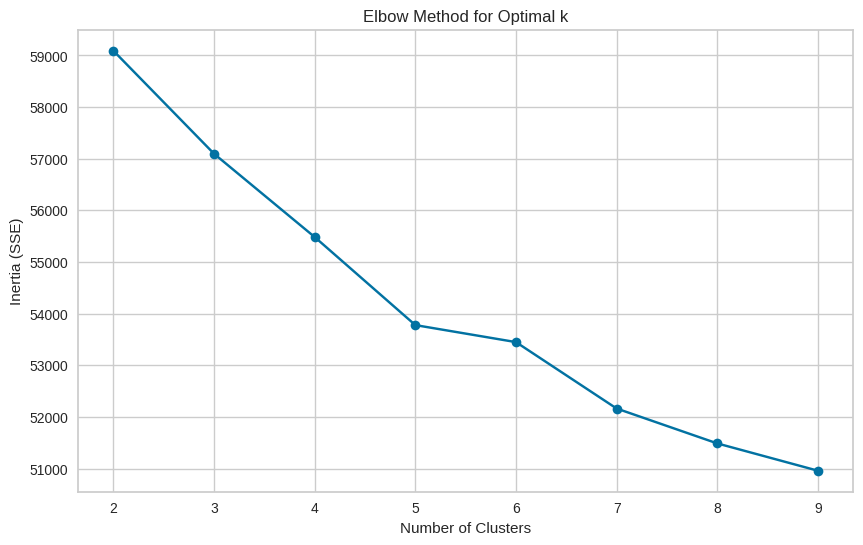

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mencari jumlah cluster optimal dengan Elbow Method
inertia = []
range_clusters = range(2, 10)  # Uji jumlah cluster dari 2 hingga 10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled.drop('Cluster', axis=1, errors='ignore'))  # Menghapus kolom 'Cluster' jika ada
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.show()

Silhouette Score for 2 clusters: 0.1543
Silhouette Score for 3 clusters: 0.1075
Silhouette Score for 4 clusters: 0.0639
Silhouette Score for 5 clusters: 0.0691
Silhouette Score for 6 clusters: 0.0548
Silhouette Score for 7 clusters: 0.0579
Silhouette Score for 8 clusters: 0.0566
Silhouette Score for 9 clusters: 0.0547


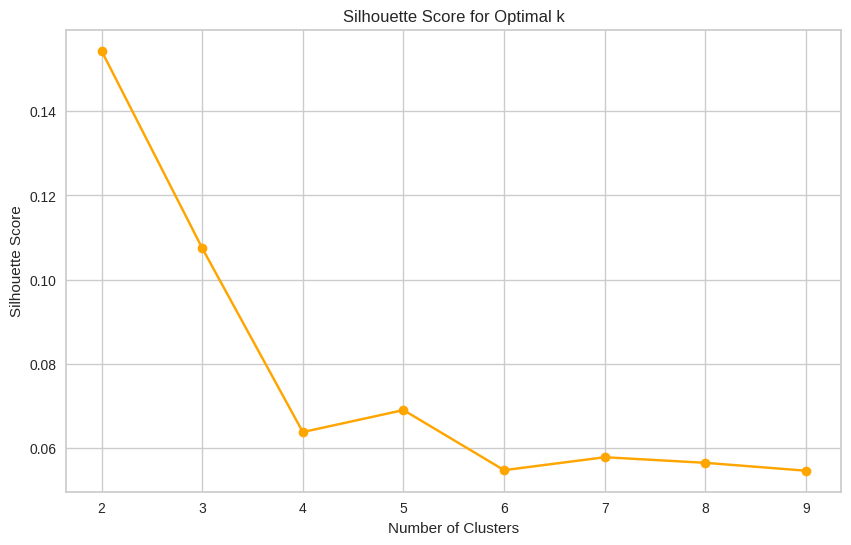

In [26]:
# Menghitung Silhouette Score untuk setiap jumlah cluster
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled.drop('Cluster', axis=1, errors='ignore'))
    score = silhouette_score(df_scaled.drop('Cluster', axis=1, errors='ignore'), labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Pada grafik Elbow Method, terlihat penurunan nilai Inertia yang cukup signifikan dari jumlah cluster 2 hingga 5. Setelah itu, penurunannya mulai melambat. Meskipun tidak ada titik siku yang sangat jelas, nilai K yang paling mungkin optimal adalah 5.
- Nilai Silhouette Score memiliki nilai Silhouette Score relatif rendah, berkisar antara 0.0547 hingga 0.1543. Ini mengindikasikan bahwa pemisahan antar cluster tidak terlalu jelas.
- Nilai Silhouette Score cenderung menurun seiring dengan peningkatan jumlah cluster.

Kesimpulan sementara:
- Tidak Ada K Optimal yang Jelas karena Grafik Elbow tidak menunjukkan titik siku yang sangat jelas, dan nilai Silhouette Score untuk semua nilai K relatif rendah. Ini mengindikasikan bahwa tidak ada jumlah cluster yang optimal yang memberikan pemisahan yang sangat baik antar cluster.
- Kualitas clustering secara keseluruhan kurang baik. Data mungkin sulit untuk dikelompokkan menjadi cluster yang jelas dan terpisah.

## **c. Feature Selection (Opsional)**

Karena hasil clustering sebelumnya buruk, maka perlu dilakukan geature selection untuk optimasi model clustering.
Dalam tahap ini dilakukan beberapa hal:
- Menentukan fitur yang paling berpengaruh untuk klustering
- Menentukan jumlah K clustering berdasarkan  Silhouette Score terbaik
- Melakukan pemodelan ulang dan evaluasi kembali menggunakan kolom-kolom hasil feature selection
- Membandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Untuk memulai, saya mengevaluasi fitur mana yang berkontribusi paling besar dalam pemodelan clustering. Saya menggunakan teknik eksplorasi data seperti analisis korelasi dan visualisasi distribusi fitur untuk menentukan fitur yang paling relevan. Dalam hal ini, fitur-fitur yang memiliki korelasi kuat dengan target dan memiliki variabilitas yang cukup tinggi akan dipilih.

Korelasi terhadap Kolom 'Cluster':
Cluster                     1.000000
Gender                      0.808533
Purchase Amount (USD)       0.064266
Review Rating               0.060279
Color                       0.000445
Preferred Payment Method   -0.007485
Location                   -0.008101
Size                       -0.015326
Category                   -0.015681
Season                     -0.020999
Payment Method             -0.021642
Previous Purchases         -0.042682
Item Purchased             -0.047893
Frequency of Purchases     -0.054202
Shipping Type              -0.065321
Age                        -0.081999
Subscription Status        -0.124367
Discount Applied           -0.625875
Promo Code Used            -0.625875
Name: Cluster, dtype: float64


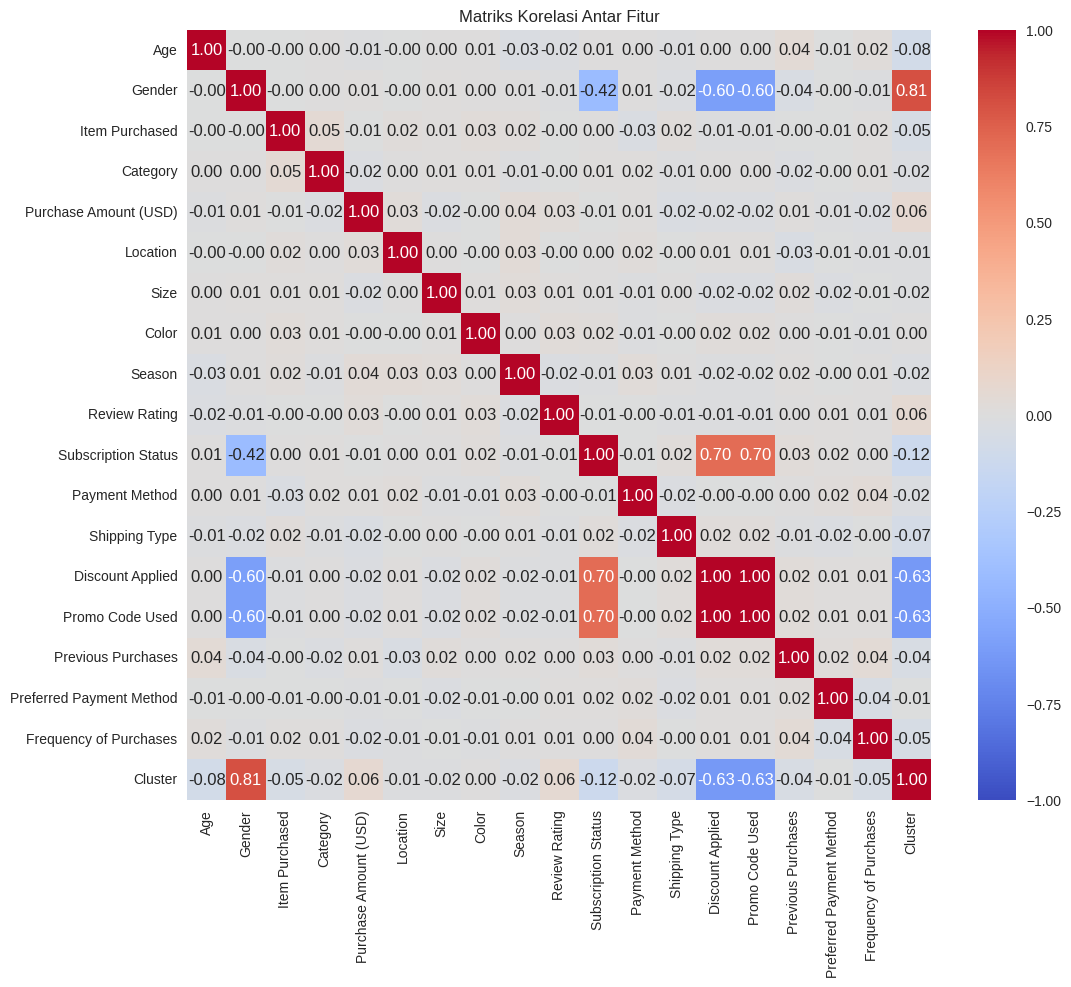

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_scaled.corr()
# Menampilkan korelasi terhadap Cluster
if 'Cluster' in correlation.columns:
    print("Korelasi terhadap Kolom 'Cluster':")
    print(correlation['Cluster'].sort_values(ascending=False))
else:
    print("Kolom 'Cluster' tidak ditemukan dalam dataset yang sudah di-scale.")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

In [25]:
# Memilih fitur yang dipilih
selected_features = ['Discount Applied', 'Promo Code Used', 'Subscription Status', 'Gender', 'Size']

# Dataset baru dengan fitur terpilih
df_selected = df_scaled[selected_features]

print("Dataset dengan fitur yang dipilih:")
print(df_selected.head())


Dataset dengan fitur yang dipilih:
   Discount Applied  Promo Code Used  Subscription Status    Gender      Size
0          1.151339         1.151339             1.644294 -0.685994  0.771136
1          1.151339         1.151339             1.644294 -0.685994  0.771136
2          1.151339         1.151339             1.644294 -0.685994 -1.496910
3          1.151339         1.151339             1.644294 -0.685994 -0.362887
4          1.151339         1.151339             1.644294 -0.685994 -0.362887


Setelah melakukan seleksi fitur, saya melanjutkan dengan memilih jumlah cluster K yang optimal dengan menggunakan Silhouette Score. Silhouette Score mengukur seberapa baik suatu objek diklasifikasikan dalam cluster yang benar dengan membandingkan kedekatannya dengan cluster lain. Saya mencoba berbagai jumlah cluster mulai dari 2 hingga 9 untuk menemukan jumlah cluster yang memberikan hasil terbaik.

Silhouette Score untuk 2 cluster: 0.5427
Silhouette Score untuk 3 cluster: 0.5364
Silhouette Score untuk 4 cluster: 0.5900
Silhouette Score untuk 5 cluster: 0.6289
Silhouette Score untuk 6 cluster: 0.6140
Silhouette Score untuk 7 cluster: 0.6407
Silhouette Score untuk 8 cluster: 0.6882
Silhouette Score untuk 9 cluster: 0.7696


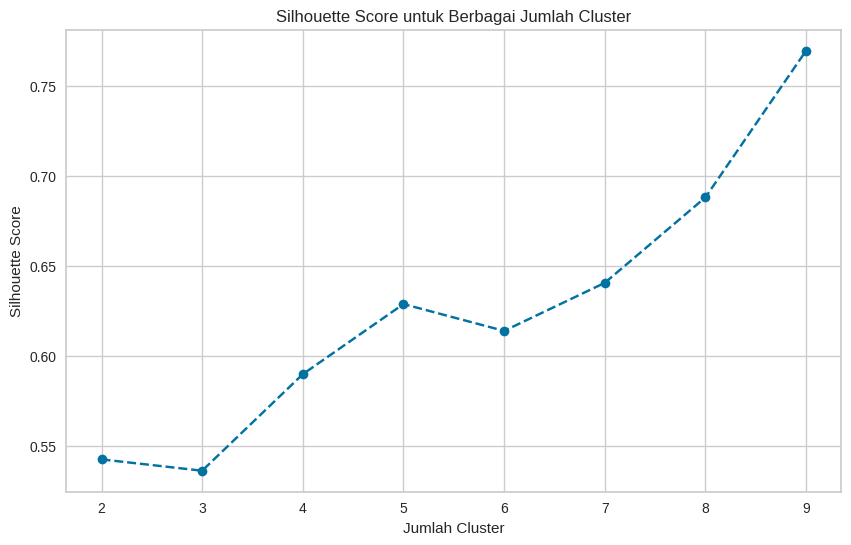

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mencoba beberapa jumlah cluster untuk mencari yang optimal
silhouette_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score untuk {n_clusters} cluster: {silhouette_avg:.4f}")

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.show()


Berdasarkan hasil ini, saya memilih 9 cluster karena memberikan Silhouette Score tertinggi (0.7696), yang menunjukkan bahwa cluster yang terbentuk lebih terpisah dengan baik.

Pemodelan Ulang

Setelah menentukan jumlah cluster yang optimal dan memilih fitur-fitur yang relevan, saya melakukan pemodelan ulang dengan menggunakan K-Means dengan 9 cluster. Setelah itu, saya mengevaluasi hasil clustering menggunakan Silhouette Score dan analisis visual untuk memastikan bahwa pemisahan antar cluster lebih jelas dan representatif.

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

selected_features = ['Discount Applied', 'Promo Code Used', 'Subscription Status', 'Gender', 'Size']

# Dataset baru dengan fitur terpilih
df_selected = df_scaled[selected_features]

# Membuat model clustering dengan jumlah cluster yang optimal (misalnya 9)
kmeans = KMeans(n_clusters=9, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_selected)
silhouette_avg = silhouette_score(df_selected, df_scaled['Cluster'])

print(f"Silhouette Score Sesudah Feature Selection: {silhouette_avg:.4f}")


Silhouette Score Sesudah Feature Selection: 0.7696


In [27]:
df_all_features = df_scaled.copy()

kmeans_all = KMeans(n_clusters=10, random_state=42)
df_all_features['Cluster'] = kmeans_all.fit_predict(df_all_features)

# Hitung Silhouette Score sebelum fitur selection
sil_score_before = silhouette_score(df_all_features, df_all_features['Cluster'])
print(f"Silhouette Score sebelum fitur selection: {sil_score_before:.4f}")


Silhouette Score sebelum fitur selection: 0.1166


Pembahasan:

Perbandingan performa model dilakukan dengan cara membandingkan Silhouette Score dan hasil visualisasi cluster sebelum dan sesudah feature selection diterapkan. Berdasarkan perbandingan Silhouette Score, diketahui jika terjadi peningkatan Silhouette Score setelah dilakukan feature selection yang menunjukkan bahwa cluster yang terbentuk lebih terpisah dan lebih homogen.

**Kesimpulan:**

Evaluasi Akhir pada Clustering setelah menerapkan Feature Selection Mencapai Nilai Silhouette Score **0.7696** yang artinya telah melebihi batas minimal (0.55)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah tampilan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [28]:
# Cek jumlah data per cluster
cluster_counts = df_scaled['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    777
2    646
3    598
5    407
4    397
6    377
8    337
0    227
7    134
Name: count, dtype: int64


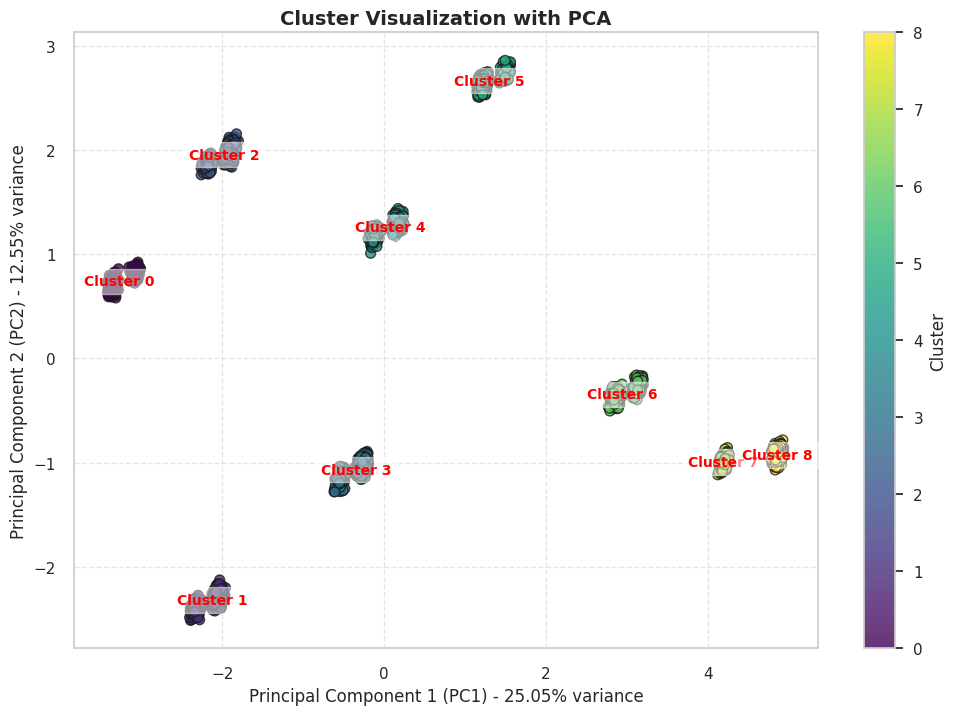

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA (2 komponen)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df_scaled)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    data_2d[:, 0],
    data_2d[:, 1],
    c=df_scaled['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.8,
    edgecolor='k'
)
# Menambahkan label centroid cluster
centroids = pd.DataFrame(data_2d).groupby(df_scaled['Cluster']).mean().values
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i}', fontsize=10, fontweight='bold',
             color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

explained_variance = pca.explained_variance_ratio_ * 100
plt.xlabel(f'Principal Component 1 (PC1) - {explained_variance[0]:.2f}% variance', fontsize=12)
plt.ylabel(f'Principal Component 2 (PC2) - {explained_variance[1]:.2f}% variance', fontsize=12)
plt.title('Cluster Visualization with PCA', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


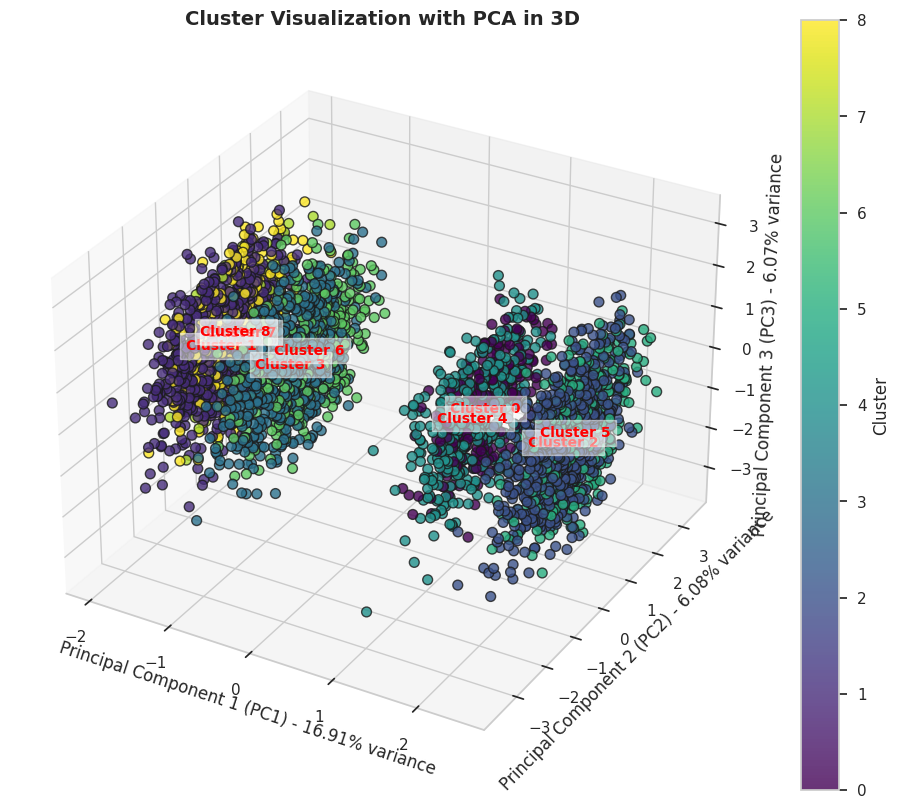

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Reduksi dimensi dengan PCA (3 komponen)
pca = PCA(n_components=3)
data_3d = pca.fit_transform(df_scaled.drop(columns=['Cluster']))  # Pastikan kolom 'Cluster' tidak ikut di PCA
sns.set(style="whitegrid")

# Membuat figure dan subplot 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Visualisasi hasil clustering dalam 3D dengan scatter plot
scatter = ax.scatter(
    data_3d[:, 0],
    data_3d[:, 1],
    data_3d[:, 2],
    c=df_scaled['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.8,
    edgecolor='k'
)
centroids_3d = pd.DataFrame(data_3d).groupby(df_scaled['Cluster']).mean().values
for i, centroid in enumerate(centroids_3d):
    ax.text(centroid[0], centroid[1], centroid[2], f'Cluster {i}', fontsize=10, fontweight='bold',
            color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
explained_variance = pca.explained_variance_ratio_ * 100
ax.set_xlabel(f'Principal Component 1 (PC1) - {explained_variance[0]:.2f}% variance', fontsize=12)
ax.set_ylabel(f'Principal Component 2 (PC2) - {explained_variance[1]:.2f}% variance', fontsize=12)
ax.set_zlabel(f'Principal Component 3 (PC3) - {explained_variance[2]:.2f}% variance', fontsize=12)
ax.set_title('Cluster Visualization with PCA in 3D', fontsize=14, fontweight='bold')

fig.colorbar(scatter, ax=ax, label='Cluster')
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()


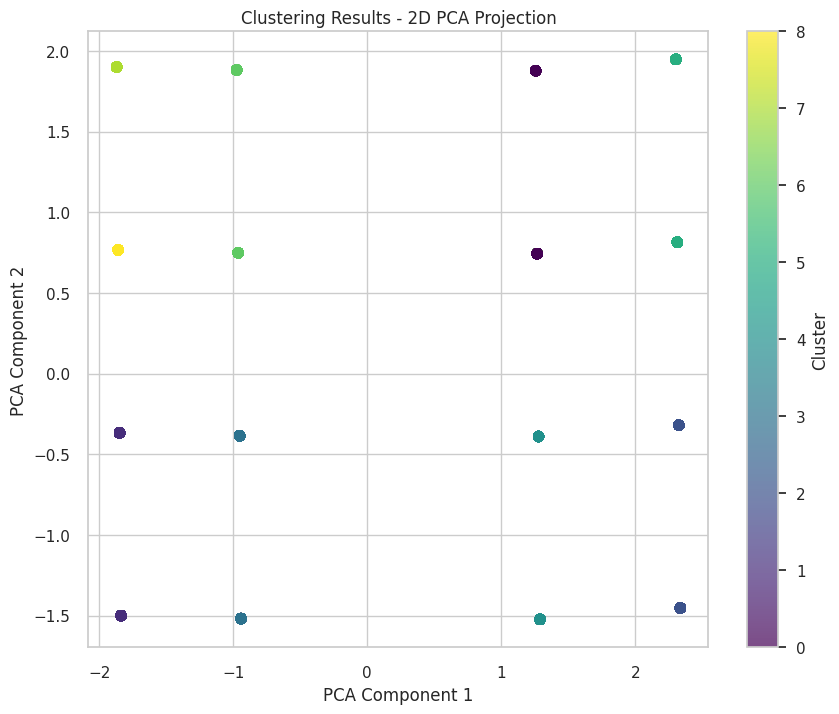

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_selected)
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

# Visualisasi Clusters dengan Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled['PCA1'], df_scaled['PCA2'], c=df_scaled['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clustering Results - 2D PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

              Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
Cluster                                                                        
0       -0.007400 -0.685994        0.010996 -0.051137              -0.118959   
1       -0.040644  1.457738       -0.010995 -0.013486               0.051034   
2        0.054849 -0.685994        0.006912  0.027350              -0.008679   
3       -0.027597 -0.685994        0.021336 -0.054226               0.014540   
4       -0.002846 -0.685994       -0.087500 -0.016049               0.011971   
5       -0.059441 -0.685994        0.001911  0.003479              -0.015987   
6        0.034747 -0.685994        0.047042  0.063085               0.000318   
7       -0.042784  1.457738        0.085280 -0.018649               0.072028   
8        0.095804  1.457738       -0.018932  0.060882              -0.070491   

         Location      Size     Color    Season  Review Rating  \
Cluster                                              

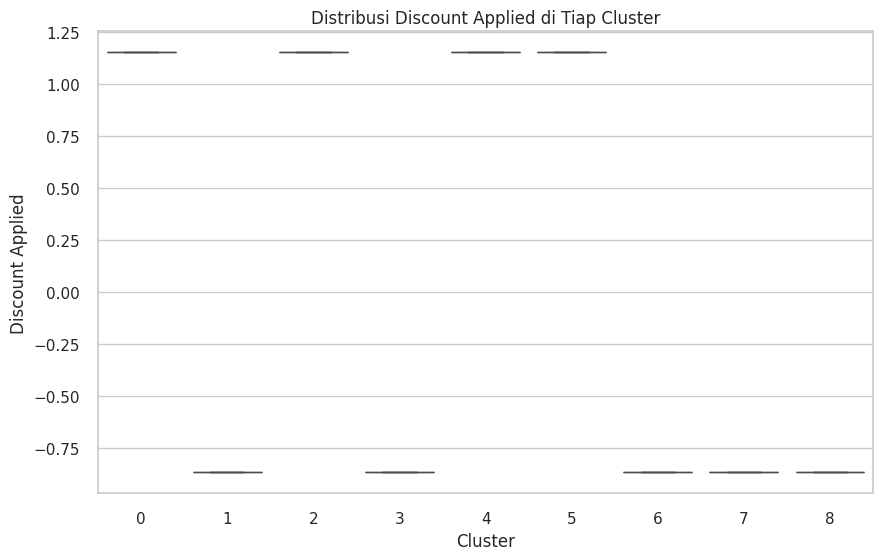

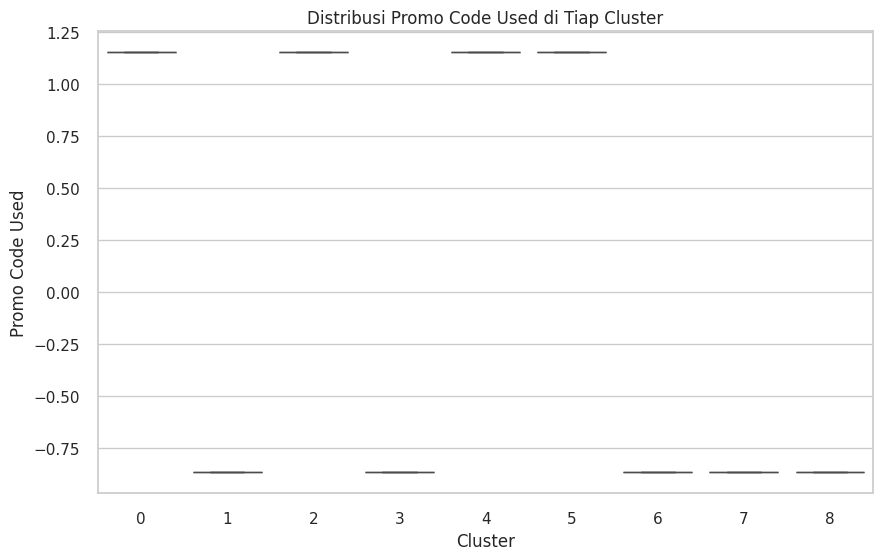

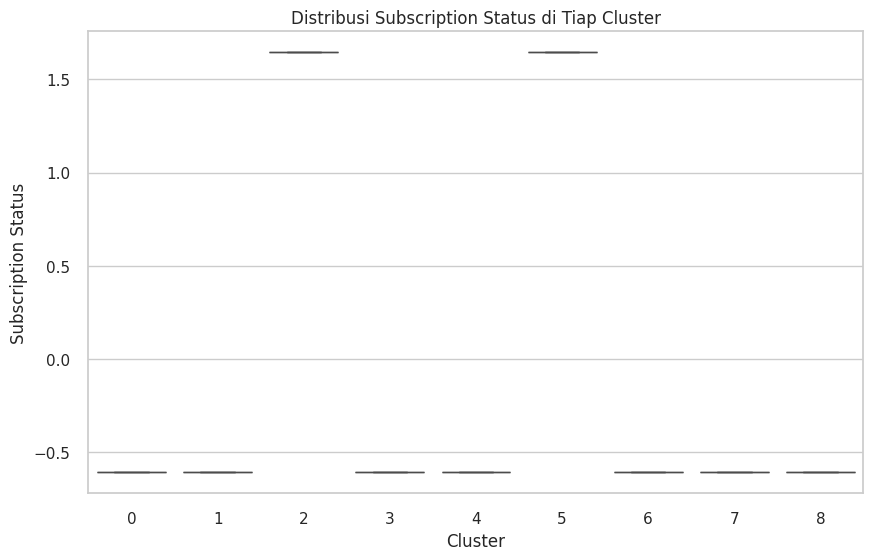

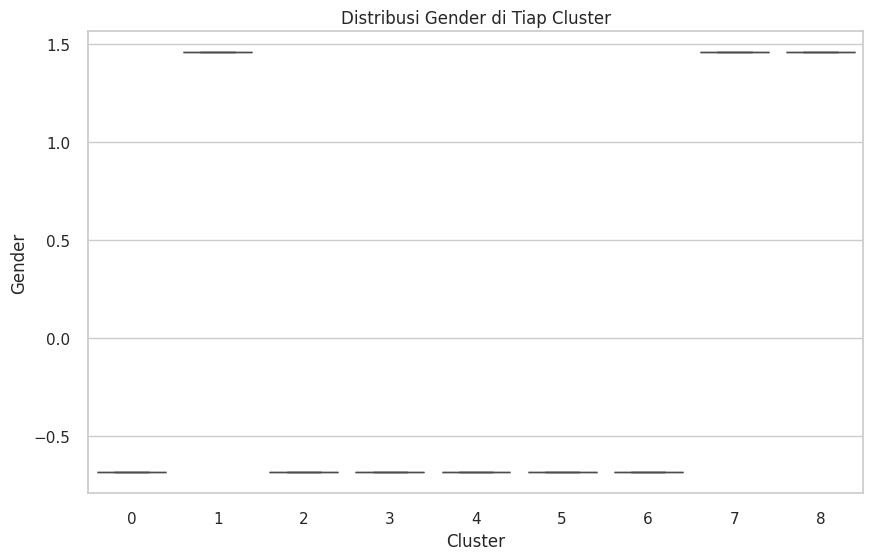

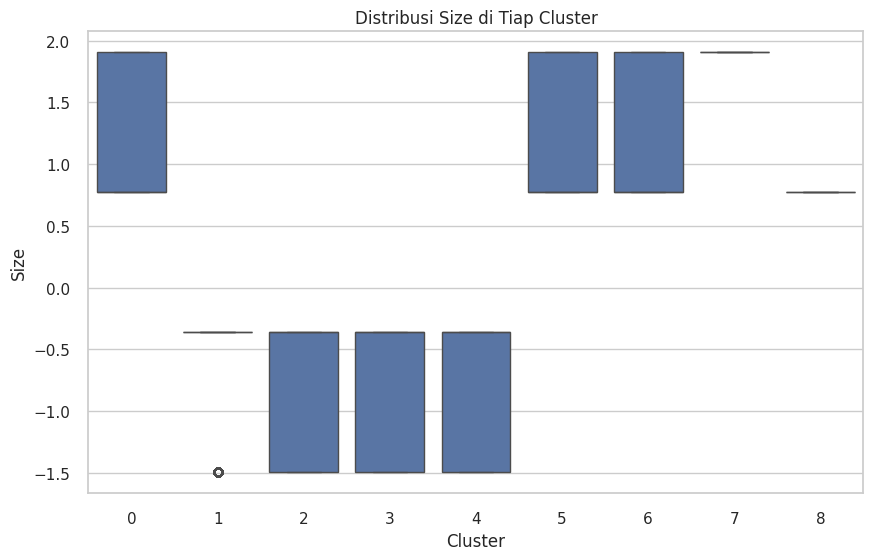

In [32]:
# Menghitung rata-rata setiap fitur untuk tiap cluster
cluster_summary = df_scaled.groupby('Cluster').mean()
print(cluster_summary)


# Visualisasi distribusi fitur dalam setiap cluster
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_scaled, x='Cluster', y=feature)
    plt.title(f'Distribusi {feature} di Tiap Cluster')
    plt.show()


## Interpretasi Hasil Clustering (9 Cluster)
1. **Cluster 0: Pelanggan Promo-Sentris, Tidak Berlangganan**

  **Karakteristik:**
  - Pelanggan ini sangat responsif terhadap promo dan diskon, terlihat dari nilai positif pada fitur Discount Applied(1.15) dan Promo Code Used (1.15), menunjukkan bahwa pelanggan dalam cluster ini sangat responsif terhadap diskon dan promosi.
  - Subscription Status negatif (-0.61), menunjukkan bahwa pelanggan ini jarang atau tidak tertarik untuk berlangganan layanan.
  - Frekuensi pembelian cenderung stabil tetapi tidak terlalu tinggi. Nilai rata-rata Frequency of Purchases (-0.10) menunjukkan pembelian yang tidak terlalu sering, tetapi tetap ada.

  **Interpretasi:**
  
  Pelanggan dalam cluster ini lebih tertarik pada keuntungan jangka pendek yang ditawarkan oleh promosi dan diskon. Mereka tidak tertarik untuk berlangganan produk atau layanan, melainkan lebih memilih untuk memanfaatkan penawaran khusus atau potongan harga.

  **Strategi Bisnis:**
  - Fokuskan promosi yang menawarkan nilai lebih, seperti diskon pertama kali untuk berlangganan.
  - Edukasi pelanggan tentang manfaat program langganan melalui kampanye yang dipersonalisasi.

2. **Cluster 1: Pembeli Stabil, Tidak Tergantung Promo**

  **Karakteristik:**
  - Nilai Discount Applied (-0.87) dan Promo Code Used (-0.87), menunjukkan bahwa pelanggan ini jarang atau tidak menggunakan promo dan diskon.
  - Subscription Status negatif (-0.61), mengindikasikan pelanggan ini tidak berlangganan layanan atau produk.
  - Nilai Frequency of Purchases (-0.03) menunjukkan bahwa mereka memiliki pola pembelian yang stabil tetapi tidak terlalu sering.

  **Interpretasi:**
  
  Pelanggan dalam cluster ini membeli berdasarkan kebutuhan, dan lebih menghargai kualitas produk daripada promosi atau penawaran diskon. Mereka menunjukkan pembelian yang konsisten, tetapi tidak sering. Mereka cenderung tidak dipengaruhi oleh promosi, dan tidak tertarik pada langganan layanan.

  **Strategi Bisnis:**
  - Fokus pada penawaran produk premium yang sesuai dengan kebutuhan pelanggan ini.
  - Bangun program loyalitas jangka panjang yang memberikan manfaat lebih untuk pelanggan ini.

3. **Cluster 2: Pelanggan Berlangganan, Pembelian Jarang**

  **Karakteristik:**
  - Nilai Discount Applied positif (1.15), menunjukkan bahwa mereka cukup aktif dalam memanfaatkan promo dan diskon.
  - Nilai Subscription Status positif (1.64), menunjukkan pelanggan dalam cluster ini aktif berlangganan layanan.
  - Nilai Frequency of Purchases (-0.02) sangat rendah, menunjukkan pembelian yang tidak terlalu sering.

  **Interpretasi:**
  
  Pelanggan ini memiliki tingkat keterlibatan rendah meskipun sudah berlangganan layanan. Mereka memanfaatkan diskon yang ditawarkan, namun pembelian mereka jarang terjadi. Mereka lebih mengutamakan manfaat dari langganan dan diskon daripada frekuensi pembelian.

  **Strategi Bisnis:**
  - Kirim penawaran eksklusif atau notifikasi pengingat untuk meningkatkan pembelian.
  - Tambahkan konten edukasi tentang manfaat maksimal dari layanan langganan.

4. **Cluster 3: Pemberi Ulasan Positif, Tidak Tergantung Promo**

  **Karakteristik:**
  - Nilai Discount Applied negatif (-0.87), menunjukkan bahwa pelanggan ini tidak tertarik pada promosi atau diskon.
  - Subscription Status negatif (-0.61), menunjukkan bahwa mereka jarang berlangganan layanan.
  - Memberikan ulasan positif tentang produk atau layanan (Review Rating tinggi).
  - Tidak terlalu aktif dalam langganan atau pembelian rutin.

  **Interpretasi:**
  
  - Meskipun jarang membeli atau menggunakan promo, pelanggan ini memberikan ulasan positif tentang produk atau layanan yang mereka gunakan.
  - Mereka puas dengan kualitas produk dan cenderung loyal meskipun tidak membeli dalam jumlah besar atau sering.

  **Strategi Bisnis:**
  - Gunakan ulasan positif mereka untuk memperkuat kampanye pemasaran.
  - Berikan apresiasi kepada pelanggan ini, misalnya undangan eksklusif atau program khusus.

5. **Cluster 4: Pembeli Aktif, Penggemar Promo**

  **Karakteristik:**
  - Nilai Discount Applied positif (1.15) dan Promo Code Used positif (1.15), menunjukkan bahwa pelanggan dalam cluster ini sangat responsif terhadap promo dan diskon.
  - Nilai Frequency of Purchases (0.09) menunjukkan pembelian yang relatif lebih sering.
  - Subscription Status negatif (-0.61), menunjukkan bahwa mereka tidak berlangganan produk atau layanan.

  **Interpretasi:**
  
  - Pelanggan ini sangat responsif terhadap promosi dan diskon, serta cenderung melakukan pembelian ketika ada penawaran khusus.
  - Meskipun aktif dalam pembelian, mereka tidak tertarik untuk berlangganan produk atau layanan.

  **Strategi Bisnis:**
  - Perbanyak promosi jangka pendek untuk mempertahankan keterlibatan pelanggan
  - Tawarkan program berlangganan dengan manfaat tambahan yang menarik.

6. **Cluster 5: Pelanggan Berlangganan, Pembelian Konsisten**

  **Karakteristik:**
  - Nilai Discount Applied positif (1.15), menunjukkan mereka memanfaatkan promo dan diskon.
  - Subscription Status positif (1.64), menunjukkan pelanggan ini sangat aktif dalam berlangganan layanan.
  - ilai Frequency of Purchases (0.05) menunjukkan bahwa mereka memiliki pembelian yang stabil.

  **Interpretasi:**
  
  - Pelanggan ini memiliki pola pembelian yang konsisten dan menunjukkan keterlibatan yang baik melalui langganan dan pembelian rutin.
  - Mereka memanfaatkan promo untuk mendapatkan lebih banyak nilai dari pembelian mereka.

  **Strategi Bisnis:**
  - Rekomendasikan produk atau layanan tambahan berbasis pola pembelian mereka
  - Berikan insentif tambahan untuk meningkatkan frekuensi pembelian.

7. **Cluster 6: Pelanggan Tidak Terlibat dan Kurang Potensial**

  **Karakteristik:**
  - Nilai Discount Applied negatif (-0.87), menunjukkan bahwa pelanggan ini jarang memanfaatkan promo.
  - Subscription Status negatif (-0.61), menunjukkan bahwa mereka tidak tertarik pada langganan.
  - Nilai Frequency of Purchases (-0.03) sangat rendah, menunjukkan ketidakaktifan dalam membeli produk atau layanan.

  **Interpretasi:**
  
  - Pelanggan ini menunjukkan keterlibatan yang sangat rendah dan berisiko tinggi untuk berhenti menjadi pelanggan.
  - Mereka tidak memanfaatkan promo atau diskon dan tidak menunjukkan minat pada langganan layanan.

  **Strategi Bisnis:**
  - Identifikasi hambatan yang membuat pelanggan ini kurang aktif (misalnya, harga atau kebutuhan).
  - Lakukan kampanye pemasaran ulang untuk menarik perhatian mereka kembali.

8. **Cluster 7: Jarang Membeli, Memberikan Ulasan Positif**

  **Karakteristik:**
  - Nilai Discount Applied negatif (-0.87), menunjukkan bahwa mereka jarang menggunakan promo atau diskon.
  - Subscription Status negatif (-0.61), mereka tidak berlangganan.
  - Nilai Frequency of Purchases (-0.05) menunjukkan pembelian yang sangat rendah, tetapi memberikan ulasan positif (Review Rating tinggi).

  **Interpretasi:**
  
  - Meskipun jarang membeli, pelanggan ini memberikan ulasan positif tentang produk atau layanan yang mereka gunakan.
  - Mereka puas dengan kualitas produk, tetapi tidak merasa perlu untuk sering melakukan pembelian.

  **Strategi Bisnis:**
  - Gunakan ulasan positif mereka untuk menarik pelanggan baru.
  - Tawarkan diskon eksklusif atau insentif khusus untuk menghargai ulasan positif.

9. **Cluster 8: Pembeli Setia Tanpa Promo**

  **Karakteristik:**
  - Nilai Discount Applied negatif (-0.87), menunjukkan bahwa pelanggan ini tidak tertarik pada promo atau diskon.
  - Subscription Status negatif (-0.61), mereka tidak tertarik dengan program langganan.
  - Nilai Frequency of Purchases (0.02) menunjukkan frekuensi pembelian yang cukup tinggi.

  **Interpretasi:**
  
  Pelanggan ini menunjukkan loyalitas tinggi terhadap produk atau layanan tanpa tergantung pada diskon atau promo. Mereka sering melakukan pembelian tetapi tidak tertarik pada penawaran promosi atau langganan.

  **Strategi Bisnis:**
  - Fokus pada pendekatan personalisasi untuk meningkatkan hubungan pelanggan.
  - Berikan penghargaan khusus atas frekuensi pembelian yang tinggi untuk mempertahankan loyalitas mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [33]:
df_scaled.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster,PCA1,PCA2
0,0.718913,-0.685994,-1.394144,-0.002002,-0.285629,-0.576399,0.771136,-0.707620,1.343515,-0.907584,...,-0.295206,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575,5,2.314216,0.813572
1,-1.648629,-0.685994,1.523236,-0.002002,0.178852,-0.436944,0.771136,-0.015163,1.343515,-0.907584,...,-1.472409,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575,5,2.314216,0.813572
2,0.390088,-0.685994,-0.143839,-0.002002,0.558882,-0.297488,-1.496910,-0.015163,-1.328897,-0.907584,...,-0.883807,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849,2,2.336104,-1.453277
3,-1.517099,-0.685994,0.272930,1.113356,1.276716,0.957614,-0.362887,-0.015163,-1.328897,-0.349027,...,0.881996,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849,2,2.325160,-0.319853
4,0.061263,-0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.362887,1.231259,-1.328897,-1.466141,...,-0.883807,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699,2,2.325160,-0.319853


In [34]:
df_scaled.to_csv('data_hasil_clustering.csv', index=False)
print("Data berhasil diekspor ke 'data_hasil_clustering.csv'")

Data berhasil diekspor ke 'data_hasil_clustering.csv'
